# Phuket Hotel Booking Project - Data Analysis

# 1.Library

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import os
from google.colab import drive

# 2.Read Data

In [2]:
# mount your Google Drive
from google.colab import drive

# Mount Google Drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# navigate to the mounted drive
import os

# Path to the folder you added the shortcut for
drive_folder_path = "/content/drive/MyDrive/Projects/Phuket Hotel Booking Project - Data Analysis "

# Change the working directory to the Google Drive folder
os.chdir(drive_folder_path)

# List all files in the current directory
file_list = os.listdir()

# Print the list of files
for file in file_list:
    print(file)

Phuket_Hotel_Booking_Project.ipynb
Phuket_hotel_bookings.csv


In [4]:
data_hotel_bookings_raw = pd.read_csv("Phuket_hotel_bookings.csv")

pd.set_option("display.max_columns", None)

data_hotel_bookings_raw

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2021,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,07/01/2015
1,Resort Hotel,0,737,2021,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,07/01/2015
2,Resort Hotel,0,7,2021,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,07/02/2015
3,Resort Hotel,0,13,2021,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,07/02/2015
4,Resort Hotel,0,14,2021,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,07/03/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2023,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,09/06/2017
119386,City Hotel,0,102,2023,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,09/07/2017
119387,City Hotel,0,34,2023,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,09/07/2017
119388,City Hotel,0,109,2023,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,09/07/2017


In [5]:
data_hotel_bookings_raw.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [6]:
data_hotel_bookings_raw.shape

(119390, 32)

In [7]:
data_hotel_bookings_raw.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

# 3.Clean Data

## 3.1. Handle Missing Values

### 3.1.1. Check Missing Values

In [8]:
data_hotel_bookings_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [9]:
data_hotel_bookings_raw.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [10]:
# check no guests in the reservation
filter_zero_booking = (data_hotel_bookings_raw["children"] == 0) \
                    & (data_hotel_bookings_raw["adults"] == 0) \
                    & (data_hotel_bookings_raw["babies"] == 0)
filter_zero_booking


0         False
1         False
2         False
3         False
4         False
          ...  
119385    False
119386    False
119387    False
119388    False
119389    False
Length: 119390, dtype: bool

In [11]:
data_hotel_bookings_raw[filter_zero_booking].shape

(180, 32)

In [12]:
data_hotel_bookings_raw[~filter_zero_booking].shape

(119210, 32)

### 3.1.2. Remove Missing Values (Listwise Deletion)

In [13]:
# remove no guests in the reservation
hotel_bookings = data_hotel_bookings_raw[~filter_zero_booking]
hotel_bookings

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2021,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,07/01/2015
1,Resort Hotel,0,737,2021,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,07/01/2015
2,Resort Hotel,0,7,2021,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,07/02/2015
3,Resort Hotel,0,13,2021,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,07/02/2015
4,Resort Hotel,0,14,2021,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,07/03/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2023,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,09/06/2017
119386,City Hotel,0,102,2023,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,09/07/2017
119387,City Hotel,0,34,2023,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,09/07/2017
119388,City Hotel,0,109,2023,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,09/07/2017


## 3.2. Handle Duplicated

### 3.2.1. Check Duplicated

In [14]:
hotel_bookings.duplicated().sum()

31980

### 3.2.2. Remove Duplicated

In [15]:
# remove duplicate rows
hotel_bookings.drop_duplicates(inplace=True)

<ipython-input-15-513b9f2766e3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_bookings.drop_duplicates(inplace=True)


In [16]:
hotel_bookings.duplicated().sum()

0

In [17]:
hotel_bookings.shape

(87230, 32)

## 3.3. Handle Outliers

### 3.3.1. Check Outliers

In [18]:
hotel_bookings.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

### 3.3.2. Remove Outliers

In [19]:
hotel_bookings[["lead_time", "total_of_special_requests", "adr"]].describe().T

,count,mean,std,min,25%,50%,75%,max
lead_time,87230.0,79.971019,86.058683,0.00,11.00,49.0,125.0,737.0
total_of_special_requests,87230.0,0.698934,0.832051,0.00,0.00,0.0,1.0,5.0
adr,87230.0,106.518031,54.891227,-6.38,72.25,98.2,134.1,5400.0


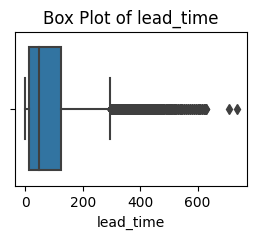

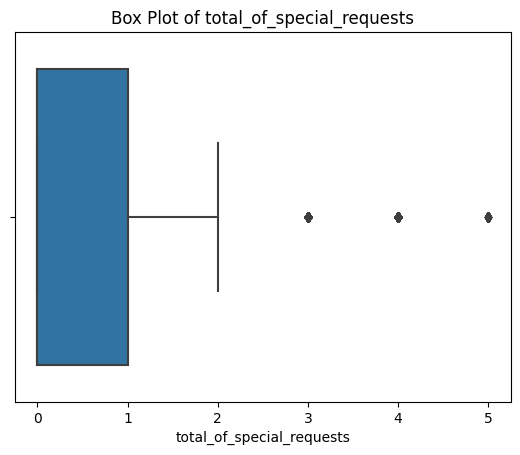

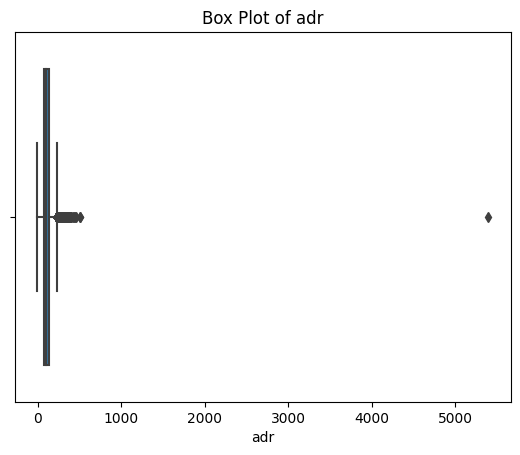

In [20]:
# Select the columns you want to create box plots for
columns_to_plot = ["lead_time", "total_of_special_requests", "adr"]

# Create a box plot for each selected column
plt.figure(figsize=(3, 2))  # Optional: Set the figure size
for column in columns_to_plot:
    sns.boxplot(x=hotel_bookings[column])
    plt.title(f'Box Plot of {column}')

    plt.show()

In [21]:
for col in ["lead_time", "total_of_special_requests", "adr"]:
    # print(col)
    print("feature name : {}".format(col))

    for i in range(90, 101, 1):
        # print(i)
        quantile_value = np.quantile(hotel_bookings[col] , q=1/100)
        print("{}th quantile value is {}".format(i , quantile_value))
    print("\n")

feature name : lead_time
90th quantile value is 0.0
91th quantile value is 0.0
92th quantile value is 0.0
93th quantile value is 0.0
94th quantile value is 0.0
95th quantile value is 0.0
96th quantile value is 0.0
97th quantile value is 0.0
98th quantile value is 0.0
99th quantile value is 0.0
100th quantile value is 0.0


feature name : total_of_special_requests
90th quantile value is 0.0
91th quantile value is 0.0
92th quantile value is 0.0
93th quantile value is 0.0
94th quantile value is 0.0
95th quantile value is 0.0
96th quantile value is 0.0
97th quantile value is 0.0
98th quantile value is 0.0
99th quantile value is 0.0
100th quantile value is 0.0


feature name : adr
90th quantile value is 0.0
91th quantile value is 0.0
92th quantile value is 0.0
93th quantile value is 0.0
94th quantile value is 0.0
95th quantile value is 0.0
96th quantile value is 0.0
97th quantile value is 0.0
98th quantile value is 0.0
99th quantile value is 0.0
100th quantile value is 0.0




In [22]:
np.quantile(hotel_bookings["lead_time"] , q=0.9)

204.0

In [23]:
# no outliers to remove

## 3.4 Handle Data Type

### 3.4.1 Check Data Type

In [23]:
hotel_bookings.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

### 3.4.2 Convert Data Type

# 4.Analysis

## 4.2 Where do the guests come from ?

In [24]:
not_cancel_booking = hotel_bookings[hotel_bookings["is_canceled"] == 0]
not_cancel_booking

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2021,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,07/01/2015
1,Resort Hotel,0,737,2021,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,07/01/2015
2,Resort Hotel,0,7,2021,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,07/02/2015
3,Resort Hotel,0,13,2021,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,07/02/2015
4,Resort Hotel,0,14,2021,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,07/03/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2023,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,09/06/2017
119386,City Hotel,0,102,2023,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,09/07/2017
119387,City Hotel,0,34,2023,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,09/07/2017
119388,City Hotel,0,109,2023,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,09/07/2017


In [25]:
# Group the data by the "country" column and count the number of guests from each country
guests_by_country = not_cancel_booking["country"].value_counts()

# Create a DataFrame from the series
guests_by_country_df = pd.DataFrame({"country": guests_by_country.index, "Number of Guests": guests_by_country.values})

# Display the DataFrame
guests_by_country_df

,country,Number of Guests
0,PRT,17573
1,GBR,8440
2,FRA,7091
3,ESP,5382
4,DEU,4332
...,...,...
160,ZMB,1
161,SYC,1
162,MDG,1
163,SMR,1


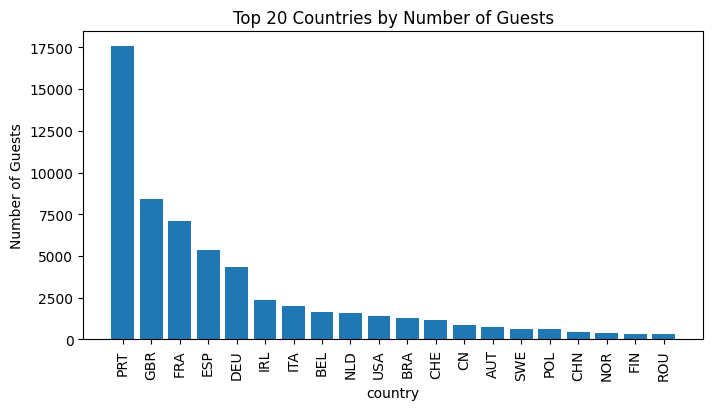

In [26]:
# Display the top countries with the most guests in a bar plot
plt.figure(figsize=(8, 4))  # Optional: Set the figure size
plt.bar(guests_by_country_df["country"][:20], guests_by_country_df["Number of Guests"][:20])
plt.xlabel("country")
plt.ylabel("Number of Guests")
plt.title("Top 20 Countries by Number of Guests")
plt.xticks(rotation=90)

plt.show()

In [28]:
# !pip install plotly

In [29]:
# !pip install --upgrade plotly

In [27]:
import plotly.express as px

# Create a choropleth map using Plotly Express with a darker color scale
fig = px.choropleth(data_frame = guests_by_country_df,
                    locations = guests_by_country_df["country"],  # Column with country codes or names
                    color = guests_by_country_df["Number of Guests"],  # Column to color-code
                    hover_name = guests_by_country_df["country"],  # Column to display on hover
                    title="Number of Guests by Country",
                    color_continuous_scale="Viridis",  # Use a darker color scale like 'Oranges'
                    locationmode="country names") # Set the location mode to use country names

# Show the map
fig.show()

In [31]:
# Most guests are from Portugal and other countries in Europe

## 4.2 Is any difference between assigned and reserved room types or not ?

In [28]:
hotel_bookings.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2021,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,07/01/2015
1,Resort Hotel,0,737,2021,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,07/01/2015
2,Resort Hotel,0,7,2021,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,07/02/2015
3,Resort Hotel,0,13,2021,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,07/02/2015
4,Resort Hotel,0,14,2021,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,07/03/2015


In [29]:
# Create the crosstab and calculate the total count for each combination
reserved_assigned_crosstab = pd.crosstab(hotel_bookings['reserved_room_type'], hotel_bookings['assigned_room_type'], margins=True, margins_name="Total")

reserved_assigned_crosstab

assigned_room_type,A,B,C,D,E,F,G,H,I,K,L,Total
reserved_room_type,,,,,,,,,,,,
A,45850,892,1253,6402,1034,390,176,94,205,140,0,56436
B,106,872,0,5,2,2,8,0,0,1,0,996
C,5,2,866,6,4,2,10,9,10,0,0,914
D,295,27,32,15979,657,199,82,9,67,29,0,17376
E,15,2,6,22,5458,383,97,4,40,9,0,6036
F,6,14,0,4,31,2636,113,3,10,3,0,2820
G,5,1,2,0,4,14,1999,7,15,3,0,2050
H,0,0,0,1,0,0,10,579,6,0,0,596
L,1,1,1,0,0,1,0,1,0,0,1,6


In [30]:
# Create the crosstab and calculate the total count for each combination
reserved_assigned_normalise = pd.crosstab(hotel_bookings['reserved_room_type'], hotel_bookings['assigned_room_type'], normalize='index', margins_name="Total").round(2) * 100

reserved_assigned_normalise

assigned_room_type,A,B,C,D,E,F,G,H,I,K,L
reserved_room_type,,,,,,,,,,,
A,81.0,2.0,2.0,11.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
B,11.0,88.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
C,1.0,0.0,95.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
D,2.0,0.0,0.0,92.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0
E,0.0,0.0,0.0,0.0,90.0,6.0,2.0,0.0,1.0,0.0,0.0
F,0.0,0.0,0.0,0.0,1.0,93.0,4.0,0.0,0.0,0.0,0.0
G,0.0,0.0,0.0,0.0,0.0,1.0,98.0,0.0,1.0,0.0,0.0
H,0.0,0.0,0.0,0.0,0.0,0.0,2.0,97.0,1.0,0.0,0.0
L,17.0,17.0,17.0,0.0,0.0,17.0,0.0,17.0,0.0,0.0,17.0


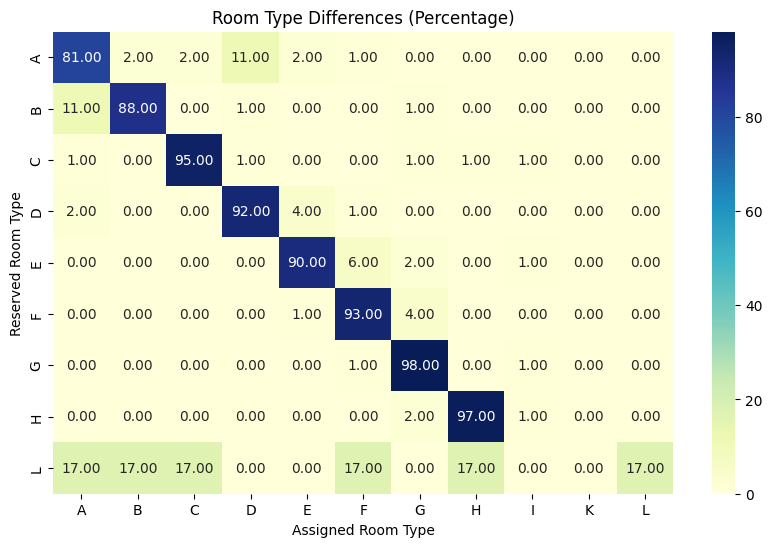

In [31]:
# Create a heatmap with color visualization
plt.figure(figsize=(10, 6))
sns.heatmap(reserved_assigned_normalise, annot=True, fmt='.2f', cmap='YlGnBu', cbar=True)
plt.xlabel('Assigned Room Type')
plt.ylabel('Reserved Room Type')
plt.title('Room Type Differences (Percentage)')

plt.show()

In [ ]:
"""

Q.. Is any difference between assigned and reserved room type ?
Ans : Yes


"""

## 4.3 Which market segment has highest booking?

In [32]:
hotel_bookings.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2021,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,07/01/2015
1,Resort Hotel,0,737,2021,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,07/01/2015
2,Resort Hotel,0,7,2021,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,07/02/2015
3,Resort Hotel,0,13,2021,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,07/02/2015
4,Resort Hotel,0,14,2021,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,07/03/2015


In [33]:
# Group the data by the "market_segment" column and calculate the total number of bookings for each segment
segment_booking_counts = hotel_bookings['market_segment'].value_counts().reset_index()
segment_booking_counts.columns = ['Market Segment', 'Booking Count']

# Calculate the percentages
segment_booking_counts['Percentage'] = (segment_booking_counts['Booking Count'] / segment_booking_counts['Booking Count'].sum()).round(2) * 100

segment_booking_counts

,Market Segment,Booking Count,Percentage
0,Online TA,51553,59.0
1,Offline TA/TO,13855,16.0
2,Direct,11780,14.0
3,Groups,4922,6.0
4,Corporate,4200,5.0
5,Complementary,692,1.0
6,Aviation,226,0.0
7,Undefined,2,0.0


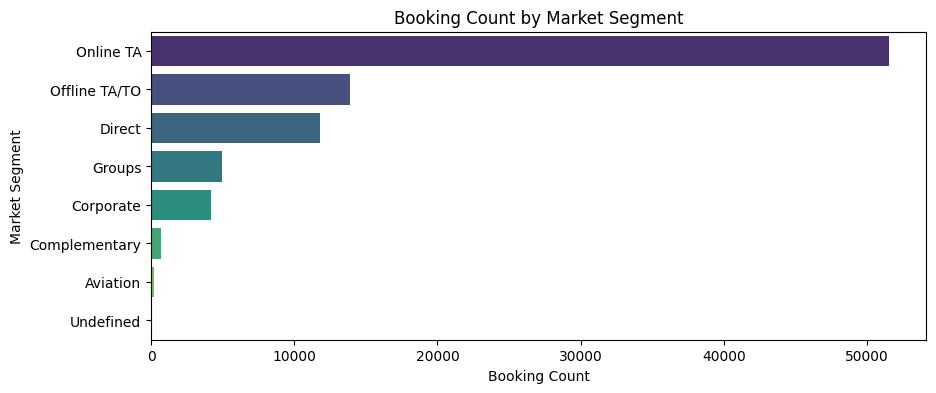

In [34]:
# Create a bar plot to visualize the booking counts
plt.figure(figsize=(10, 4))
sns.barplot(data=segment_booking_counts, x='Booking Count', y='Market Segment', palette='viridis')
plt.xlabel('Booking Count')
plt.ylabel('Market Segment')
plt.title('Booking Count by Market Segment')

plt.show()

In [35]:
segment_booking_counts

,Market Segment,Booking Count,Percentage
0,Online TA,51553,59.0
1,Offline TA/TO,13855,16.0
2,Direct,11780,14.0
3,Groups,4922,6.0
4,Corporate,4200,5.0
5,Complementary,692,1.0
6,Aviation,226,0.0
7,Undefined,2,0.0


In [36]:
import plotly.express as px

# Create a pie chart
fig = px.pie(
    segment_booking_counts,
    values='Booking Count',
    names='Market Segment',
    title='Booking Distribution by Market Segment',
    hole=0.3,  # Hole in the middle of the pie chart (0.3 means 30% hole)
)

# Show the chart
fig.show()

In [42]:
# Most of the bookings have been done in "Online mode"

## 4.4 Analysing Avg.price per night (ADR) of various room-type for all the market segment

In [37]:
hotel_bookings.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2021,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,07/01/2015
1,Resort Hotel,0,737,2021,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,07/01/2015
2,Resort Hotel,0,7,2021,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,07/02/2015
3,Resort Hotel,0,13,2021,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,07/02/2015
4,Resort Hotel,0,14,2021,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,07/03/2015


In [38]:
# Group the data by 'market_segment' and 'assigned_room_type' and calculate the mean ADR
pivot_table = hotel_bookings.groupby(['market_segment', 'assigned_room_type'])['adr'].mean().reset_index()

# Pivot the table to create a pivot table
room_type_adr = pivot_table.pivot_table(values='adr', index='market_segment', columns='assigned_room_type')

# Display the pivot table
room_type_adr

assigned_room_type,A,B,C,D,E,F,G,H,I,K,L
market_segment,,,,,,,,,,,
Aviation,95.570763,102.500000,NaN,105.777158,127.500000,NaN,110.000000,NaN,NaN,0.000000,NaN
Complementary,2.649745,0.064000,4.071429,3.242568,7.801471,1.405405,1.176056,0.000000,11.908000,70.000000,NaN
Corporate,69.370414,88.487231,71.116952,59.869552,80.822760,75.413596,83.055192,70.368182,22.488214,42.562500,NaN
Direct,100.542370,96.616512,143.678391,108.877364,128.100976,146.731723,178.582862,167.707119,56.931224,96.524167,8.0
Groups,75.414872,78.923659,77.595128,75.098600,77.117680,75.603919,84.045227,59.595294,19.920652,76.636364,NaN
Offline TA/TO,80.062446,84.364500,82.633942,81.092804,95.274979,98.189588,120.971507,105.570000,22.298971,52.605294,NaN
Online TA,105.107565,103.530104,132.836635,124.684592,132.091397,171.718266,177.655313,185.531034,55.125924,75.824151,NaN
Undefined,NaN,15.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
# Reset the index to make 'market_segment' a regular column
room_type_adr_reset = room_type_adr.reset_index()
room_type_adr_reset

assigned_room_type,market_segment,A,B,C,D,E,F,G,H,I,K,L
0,Aviation,95.570763,102.500000,NaN,105.777158,127.500000,NaN,110.000000,NaN,NaN,0.000000,NaN
1,Complementary,2.649745,0.064000,4.071429,3.242568,7.801471,1.405405,1.176056,0.000000,11.908000,70.000000,NaN
2,Corporate,69.370414,88.487231,71.116952,59.869552,80.822760,75.413596,83.055192,70.368182,22.488214,42.562500,NaN
3,Direct,100.542370,96.616512,143.678391,108.877364,128.100976,146.731723,178.582862,167.707119,56.931224,96.524167,8.0
4,Groups,75.414872,78.923659,77.595128,75.098600,77.117680,75.603919,84.045227,59.595294,19.920652,76.636364,NaN
5,Offline TA/TO,80.062446,84.364500,82.633942,81.092804,95.274979,98.189588,120.971507,105.570000,22.298971,52.605294,NaN
6,Online TA,105.107565,103.530104,132.836635,124.684592,132.091397,171.718266,177.655313,185.531034,55.125924,75.824151,NaN
7,Undefined,NaN,15.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


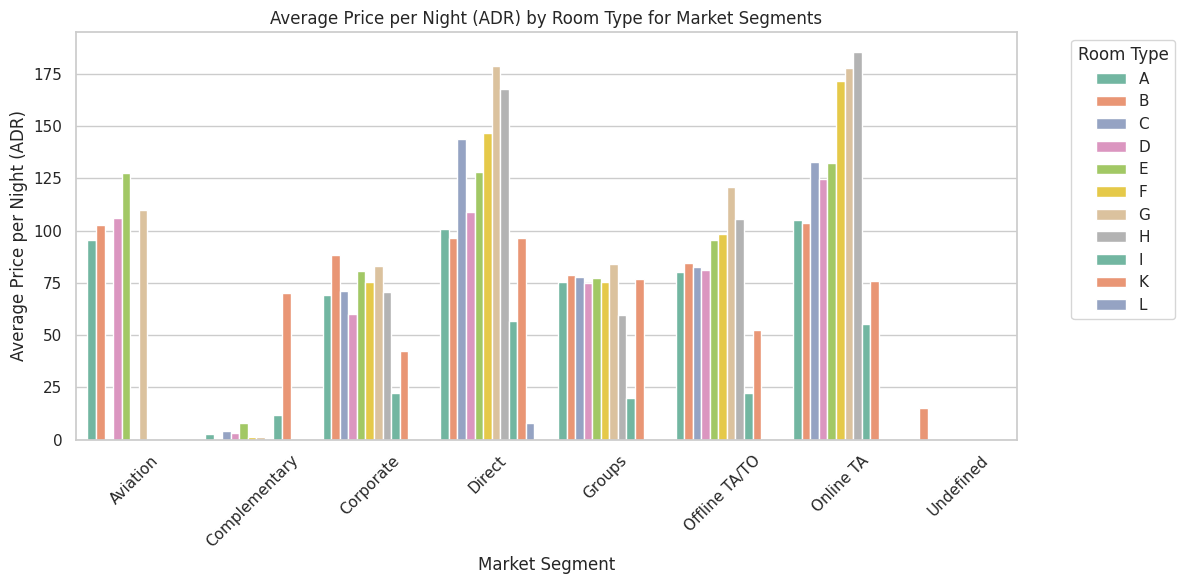

In [40]:
# Set a seaborn style
sns.set(style="whitegrid")

# Melt the DataFrame to long format for easier plotting
melted_df = room_type_adr_reset.melt(id_vars=['market_segment'], var_name='assigned_room_type', value_name='adr')

# Create a bar plot with hue representing room type
plt.figure(figsize=(12, 6))
sns.barplot(data=melted_df, x='market_segment', y='adr', hue='assigned_room_type', palette='Set2')
plt.title('Average Price per Night (ADR) by Room Type for Market Segments')
plt.xlabel('Market Segment')
plt.ylabel('Average Price per Night (ADR)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Room Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()

plt.show()

## 4.4 Total guests arrival on each day?

Is there any pattern in guests arrival, whether guests number have increased or not ?

In [41]:
hotel_bookings.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2021,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,07/01/2015
1,Resort Hotel,0,737,2021,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,07/01/2015
2,Resort Hotel,0,7,2021,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,07/02/2015
3,Resort Hotel,0,13,2021,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,07/02/2015
4,Resort Hotel,0,14,2021,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,07/03/2015


In [42]:
hotel_bookings.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [43]:
hotel_bookings[["arrival_date_year", "arrival_date_month", "arrival_date_day_of_month"]]

,arrival_date_year,arrival_date_month,arrival_date_day_of_month
0,2021,July,1
1,2021,July,1
2,2021,July,1
3,2021,July,1
4,2021,July,1
...,...,...,...
119385,2023,August,30
119386,2023,August,31
119387,2023,August,31
119388,2023,August,31


In [44]:
# Convert integer columns to strings and concatenate them
hotel_bookings["arrival_date"] = hotel_bookings["arrival_date_year"].astype(str) + " " + hotel_bookings["arrival_date_month"] + " " + hotel_bookings["arrival_date_day_of_month"].astype(str)
hotel_bookings["arrival_date"]

<ipython-input-44-ee1e0e3af052>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0            2021 July 1
1            2021 July 1
2            2021 July 1
3            2021 July 1
4            2021 July 1
               ...      
119385    2023 August 30
119386    2023 August 31
119387    2023 August 31
119388    2023 August 31
119389    2023 August 29
Name: arrival_date, Length: 87230, dtype: object

In [45]:
hotel_bookings["arrival_date"] = pd.to_datetime(hotel_bookings["arrival_date"], format='%Y %B %d')
hotel_bookings["arrival_date"]

<ipython-input-45-c6dee441b8ba>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0        2021-07-01
1        2021-07-01
2        2021-07-01
3        2021-07-01
4        2021-07-01
            ...    
119385   2023-08-30
119386   2023-08-31
119387   2023-08-31
119388   2023-08-31
119389   2023-08-29
Name: arrival_date, Length: 87230, dtype: datetime64[ns]

In [46]:
hotel_bookings.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,Resort Hotel,0,342,2021,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,07/01/2015,2021-07-01
1,Resort Hotel,0,737,2021,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,07/01/2015,2021-07-01
2,Resort Hotel,0,7,2021,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,07/02/2015,2021-07-01
3,Resort Hotel,0,13,2021,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,07/02/2015,2021-07-01
4,Resort Hotel,0,14,2021,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,07/03/2015,2021-07-01


In [47]:
guests_arrival_df = hotel_bookings[["arrival_date", "adults", "children", "babies"]]
guests_arrival_df

,arrival_date,adults,children,babies
0,2021-07-01,2,0.0,0
1,2021-07-01,2,0.0,0
2,2021-07-01,1,0.0,0
3,2021-07-01,1,0.0,0
4,2021-07-01,2,0.0,0
...,...,...,...,...
119385,2023-08-30,2,0.0,0
119386,2023-08-31,3,0.0,0
119387,2023-08-31,2,0.0,0
119388,2023-08-31,2,0.0,0


In [48]:
guests_arrival_df = guests_arrival_df.sort_values(by="arrival_date")
guests_arrival_df.head()

,arrival_date,adults,children,babies
0,2021-07-01,2,0.0,0
31,2021-07-01,2,0.0,0
32,2021-07-01,2,0.0,0
14002,2021-07-01,1,0.0,0
74966,2021-07-01,2,0.0,0


In [49]:
guests_arrival_df["guests_arrival"] = guests_arrival_df["adults"] + guests_arrival_df["children"] + guests_arrival_df["babies"]
guests_arrival_df

,arrival_date,adults,children,babies,guests_arrival
0,2021-07-01,2,0.0,0,2.0
31,2021-07-01,2,0.0,0,2.0
32,2021-07-01,2,0.0,0,2.0
14002,2021-07-01,1,0.0,0,1.0
74966,2021-07-01,2,0.0,0,2.0
...,...,...,...,...,...
39953,2023-08-31,2,0.0,0,2.0
39950,2023-08-31,2,0.0,0,2.0
39945,2023-08-31,2,0.0,0,2.0
39937,2023-08-31,1,0.0,0,1.0


In [50]:
guests_arrival_daily = guests_arrival_df.groupby("arrival_date")["guests_arrival"].sum()
guests_arrival_daily

arrival_date
2021-07-01    100.0
2021-07-02    112.0
2021-07-03    106.0
2021-07-04    126.0
2021-07-05    111.0
              ...  
2023-08-27    366.0
2023-08-28    320.0
2023-08-29    226.0
2023-08-30    187.0
2023-08-31    252.0
Name: guests_arrival, Length: 792, dtype: float64

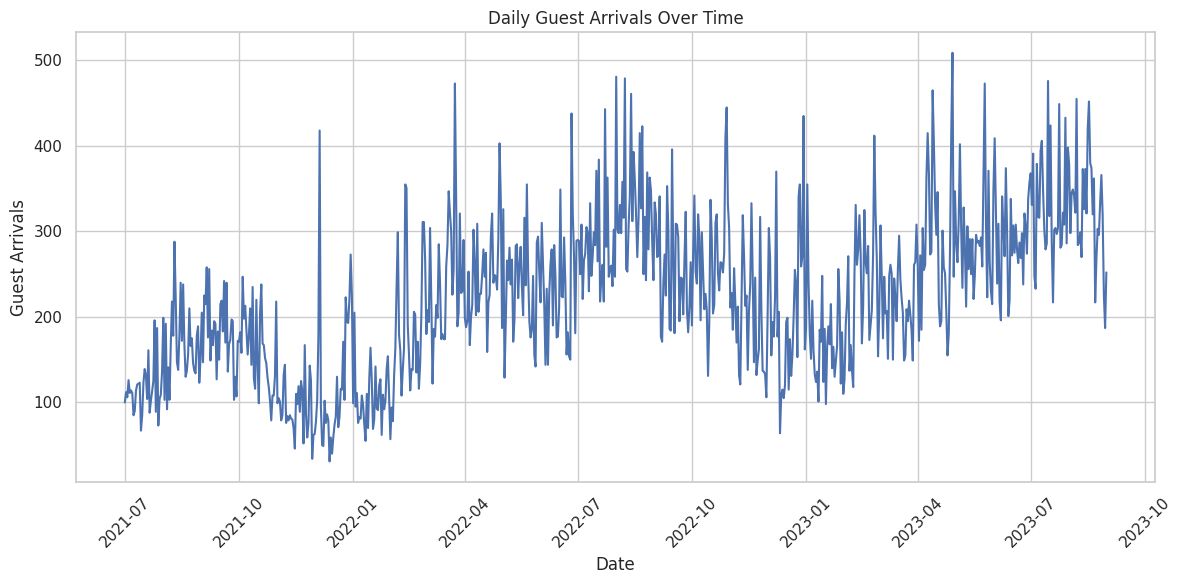

In [53]:
# Plotting
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.plot(guests_arrival_daily.index, guests_arrival_daily.values, linestyle='-')
plt.title('Daily Guest Arrivals Over Time')
plt.xlabel('Date')
plt.ylabel('Guest Arrivals')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()


In [70]:
# Is there any pattern in guests arrival, whether guests number have increased or not ?

# In summary, the line graph suggests an overall increasing trend in guest arrivals over time, with periodic fluctuations and weekly patterns.

# 5.Time series forecasting techniques or statistical analysis
- to gain more insights


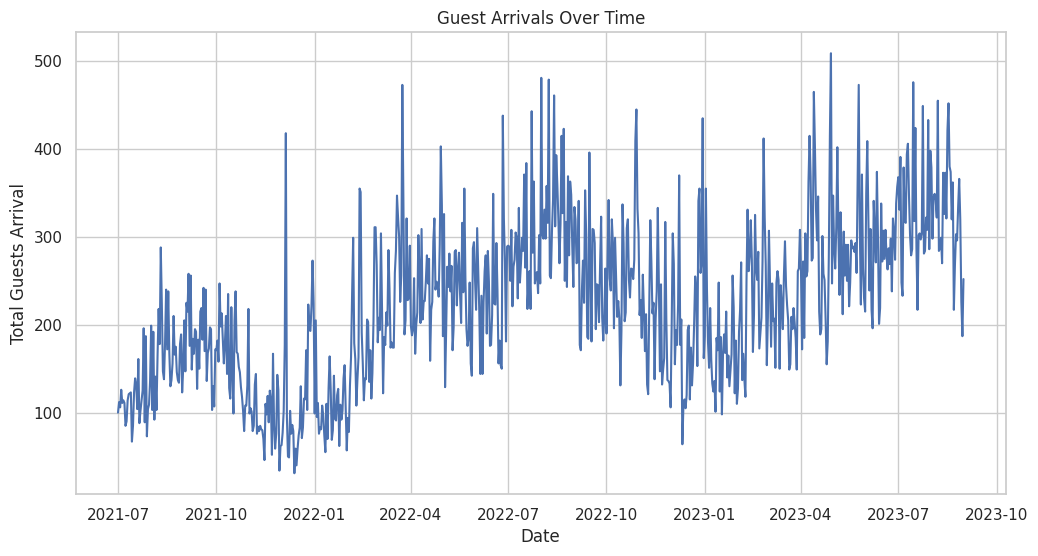

ADF Statistic: -1.8412033697047794
p-value: 0.36020561627741743


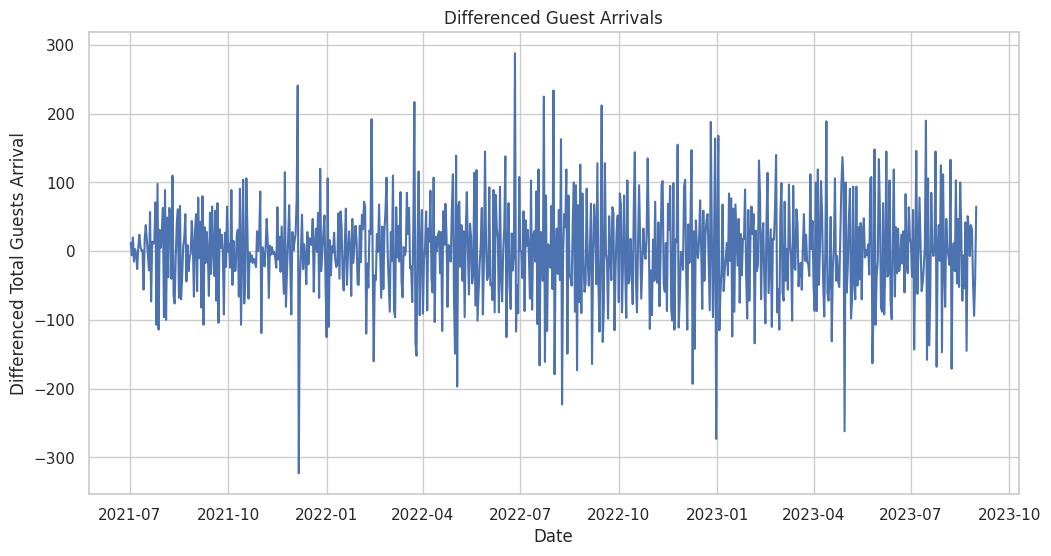

ADF Statistic (Differenced): -10.782336034714113
p-value (Differenced): 2.23866983329509e-19


In [55]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

# Load the guests_arrival_daily data
guests_arrival_daily

# Plot the original data
plt.figure(figsize=(12, 6))
plt.plot(guests_arrival_daily)
plt.title('Guest Arrivals Over Time')
plt.xlabel('Date')
plt.ylabel('Total Guests Arrival')
plt.show()

# Perform Dickey-Fuller test to check for stationarity
result = adfuller(guests_arrival_daily)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# The p-value is greater than 0.05, indicating non-stationarity.

# Differencing to make the data stationary
data_diff = guests_arrival_daily.diff().dropna()

# Plot the differenced data
plt.figure(figsize=(12, 6))
plt.plot(data_diff)
plt.title('Differenced Guest Arrivals')
plt.xlabel('Date')
plt.ylabel('Differenced Total Guests Arrival')
plt.show()

# ADF test on differenced data
result_diff = adfuller(data_diff)
print('ADF Statistic (Differenced):', result_diff[0])
print('p-value (Differenced):', result_diff[1])

# 6.Make predictions about future guest arrivals

To make predictions about future guest arrivals,
- start by plotting the existing data and then proceed to build a forecasting model.
- to visualize the time series data and make predictions using an ARIMA model:

## 6.1 Forecast for the next 6 months (180 days)

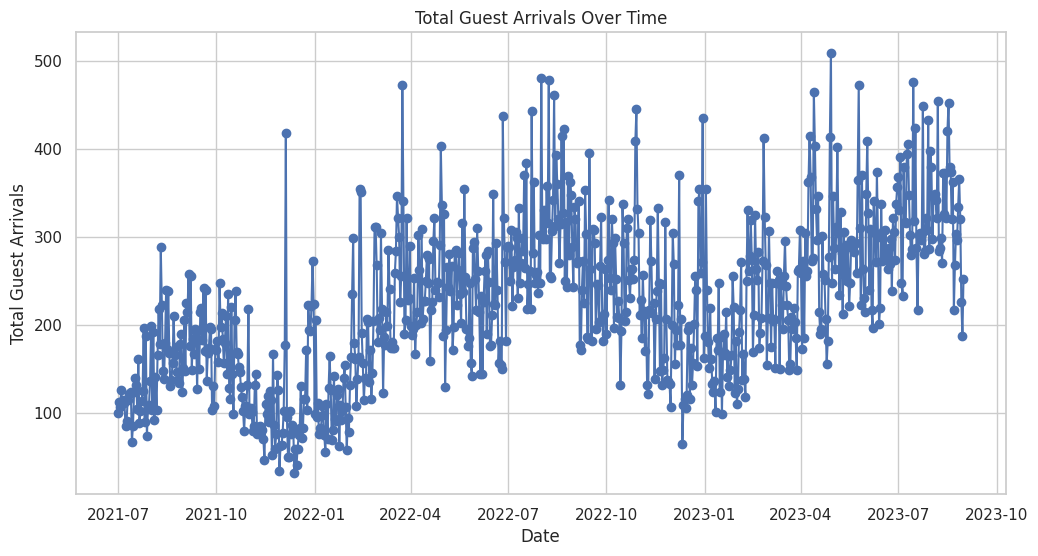

ADF Statistic: -1.8412033697047794
p-value: 0.36020561627741743


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



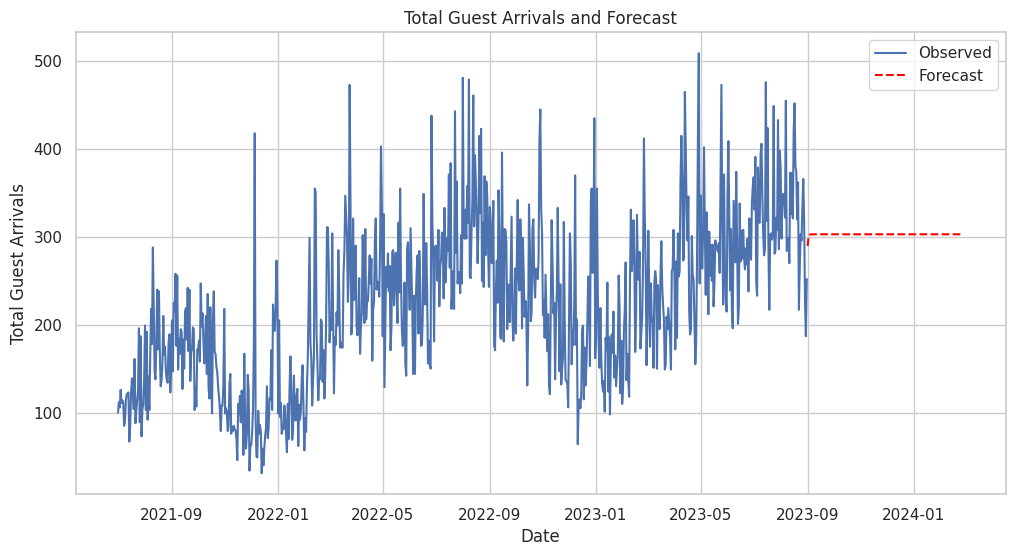

In [57]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

# Convert the index to datetime
guests_arrival_daily.index = pd.to_datetime(guests_arrival_daily.index)

# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(guests_arrival_daily.index, guests_arrival_daily.values, marker='o', linestyle='-')
plt.title('Total Guest Arrivals Over Time')
plt.xlabel('Date')
plt.ylabel('Total Guest Arrivals')
plt.grid(True)
plt.show()

# Check for stationarity using the Dickey-Fuller test
result = adfuller(guests_arrival_daily.values)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Define the orders (p, d, q) for the ARIMA model
p, d, q = 1, 1, 1

# Fit the ARIMA model
model = ARIMA(guests_arrival_daily, order=(p, d, q))
model_fit = model.fit()

# Make predictions for future guest arrivals
forecast_steps = 180  # adjust the number of future steps
forecast = model_fit.forecast(steps=forecast_steps)

# Create date index for the forecasted values
forecast_index = pd.date_range(start=guests_arrival_daily.index[-1] + pd.Timedelta(days=1), periods=forecast_steps)

# Plot the original data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(guests_arrival_daily.index, guests_arrival_daily.values, linestyle='-', label='Observed')
plt.plot(forecast_index, forecast, color='red', linestyle='--', label='Forecast')
plt.title('Total Guest Arrivals and Forecast')
plt.xlabel('Date')
plt.ylabel('Total Guest Arrivals')
plt.legend()
plt.grid(True)

plt.show()

In [58]:
# Print the forecasted values
forecast_df = pd.DataFrame({'Date': forecast_index, 'Forecasted_Guests': forecast})
forecast_df

,Date,Forecasted_Guests
2023-09-01,2023-09-01,289.691434
2023-09-02,2023-09-02,299.504094
2023-09-03,2023-09-03,302.058740
2023-09-04,2023-09-04,302.723821
2023-09-05,2023-09-05,302.896970
...,...,...
2024-02-23,2024-02-23,302.957914
2024-02-24,2024-02-24,302.957914
2024-02-25,2024-02-25,302.957914
2024-02-26,2024-02-26,302.957914


# 7.Analysing distribution of Guest Arrival
- understand the frequency and pattern of guest arrivals

In [59]:
guests_arrival_daily

arrival_date
2021-07-01    100.0
2021-07-02    112.0
2021-07-03    106.0
2021-07-04    126.0
2021-07-05    111.0
              ...  
2023-08-27    366.0
2023-08-28    320.0
2023-08-29    226.0
2023-08-30    187.0
2023-08-31    252.0
Name: guests_arrival, Length: 792, dtype: float64

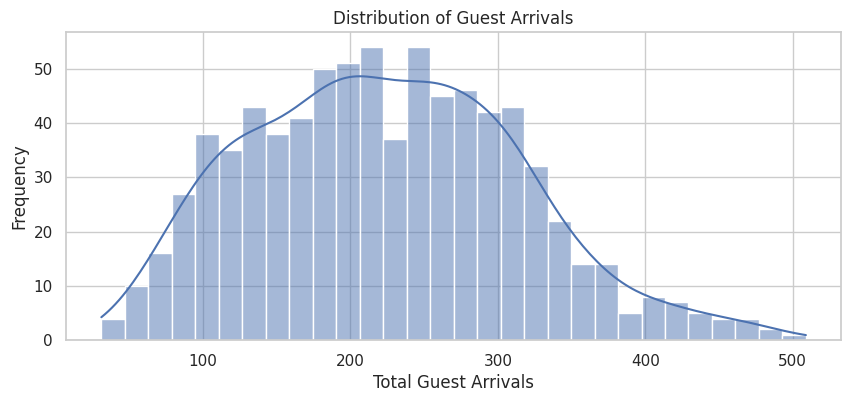

In [60]:
# Create a distribution plot of guest arrivals
plt.figure(figsize=(10, 4))
sns.histplot(guests_arrival_daily, bins=30, kde=True)
plt.title('Distribution of Guest Arrivals')
plt.xlabel('Total Guest Arrivals')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()

To summarize the distribution of guest arrivals:

- The distribution appears to be slightly right-skewed, meaning that there are more days with lower total guest arrivals than days with higher total guest arrivals.

- The majority of days seem to have total guest arrivals ranging from approximately 100 to 300.

- There are a few days with very high total guest arrivals, which are outliers in the distribution.

- The distribution has a peak around the 200 to 250 total guest arrivals range.

- The kernel density estimate (KDE) shows that the distribution is relatively smooth and unimodal (having a single peak).

Overall, the distribution suggests that most days have a moderate number of guest arrivals, with some exceptional days where the number of guest arrivals is significantly higher.

In [61]:
guests_arrival_daily.describe()

count    792.000000
mean     223.472222
std       91.042310
min       31.000000
25%      153.750000
50%      219.000000
75%      287.000000
max      509.000000
Name: guests_arrival, dtype: float64

summary of the statistics for the daily guest arrivals:

- 25% of the days have daily guest arrivals of 153 guests or less.

- The median daily guest arrival is 218 guests

- 75% of the days have daily guest arrivals of 287 guests or less.

This summary provides insights into the central tendency, variability, and distribution of daily guest arrivals over the given period.





